## Figure 1A: Temporal distribution of 7,237 sequenced viruses from March 2021 to December 2021.

In [74]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
meta = pd.read_csv('../data/rawdata/nyc_all_metadata.csv', index_col='Sequence')

In [76]:
dstart = meta['Date of Collection'].sort_values().values[0]
dend = meta['Date of Collection'].sort_values().values[-1]
months = list(set([str(i)[:7] for i in pd.date_range(dstart, dend)]))
months.sort()

In [77]:
b_alpha = []
b_delta = []
b_omicron = []
b_others = []

bars = {
    'Alpha': b_alpha,
    'Delta': b_delta,
    'Omicron': b_omicron,
    'Others': b_others
}

for v in bars:
    if v != 'Others':
        submeta = meta[meta['Clade'].str.contains(v)]
    else:
        submeta = meta[
            (~meta['Clade'].str.contains('Alpha'))
            & (~meta['Clade'].str.contains('Delta'))
            & (~meta['Clade'].str.contains('Omicron'))
        ]

    for m in months:
        count = len(submeta[submeta['Date of Collection'].str.contains(m)])
        bars[v].append(count)

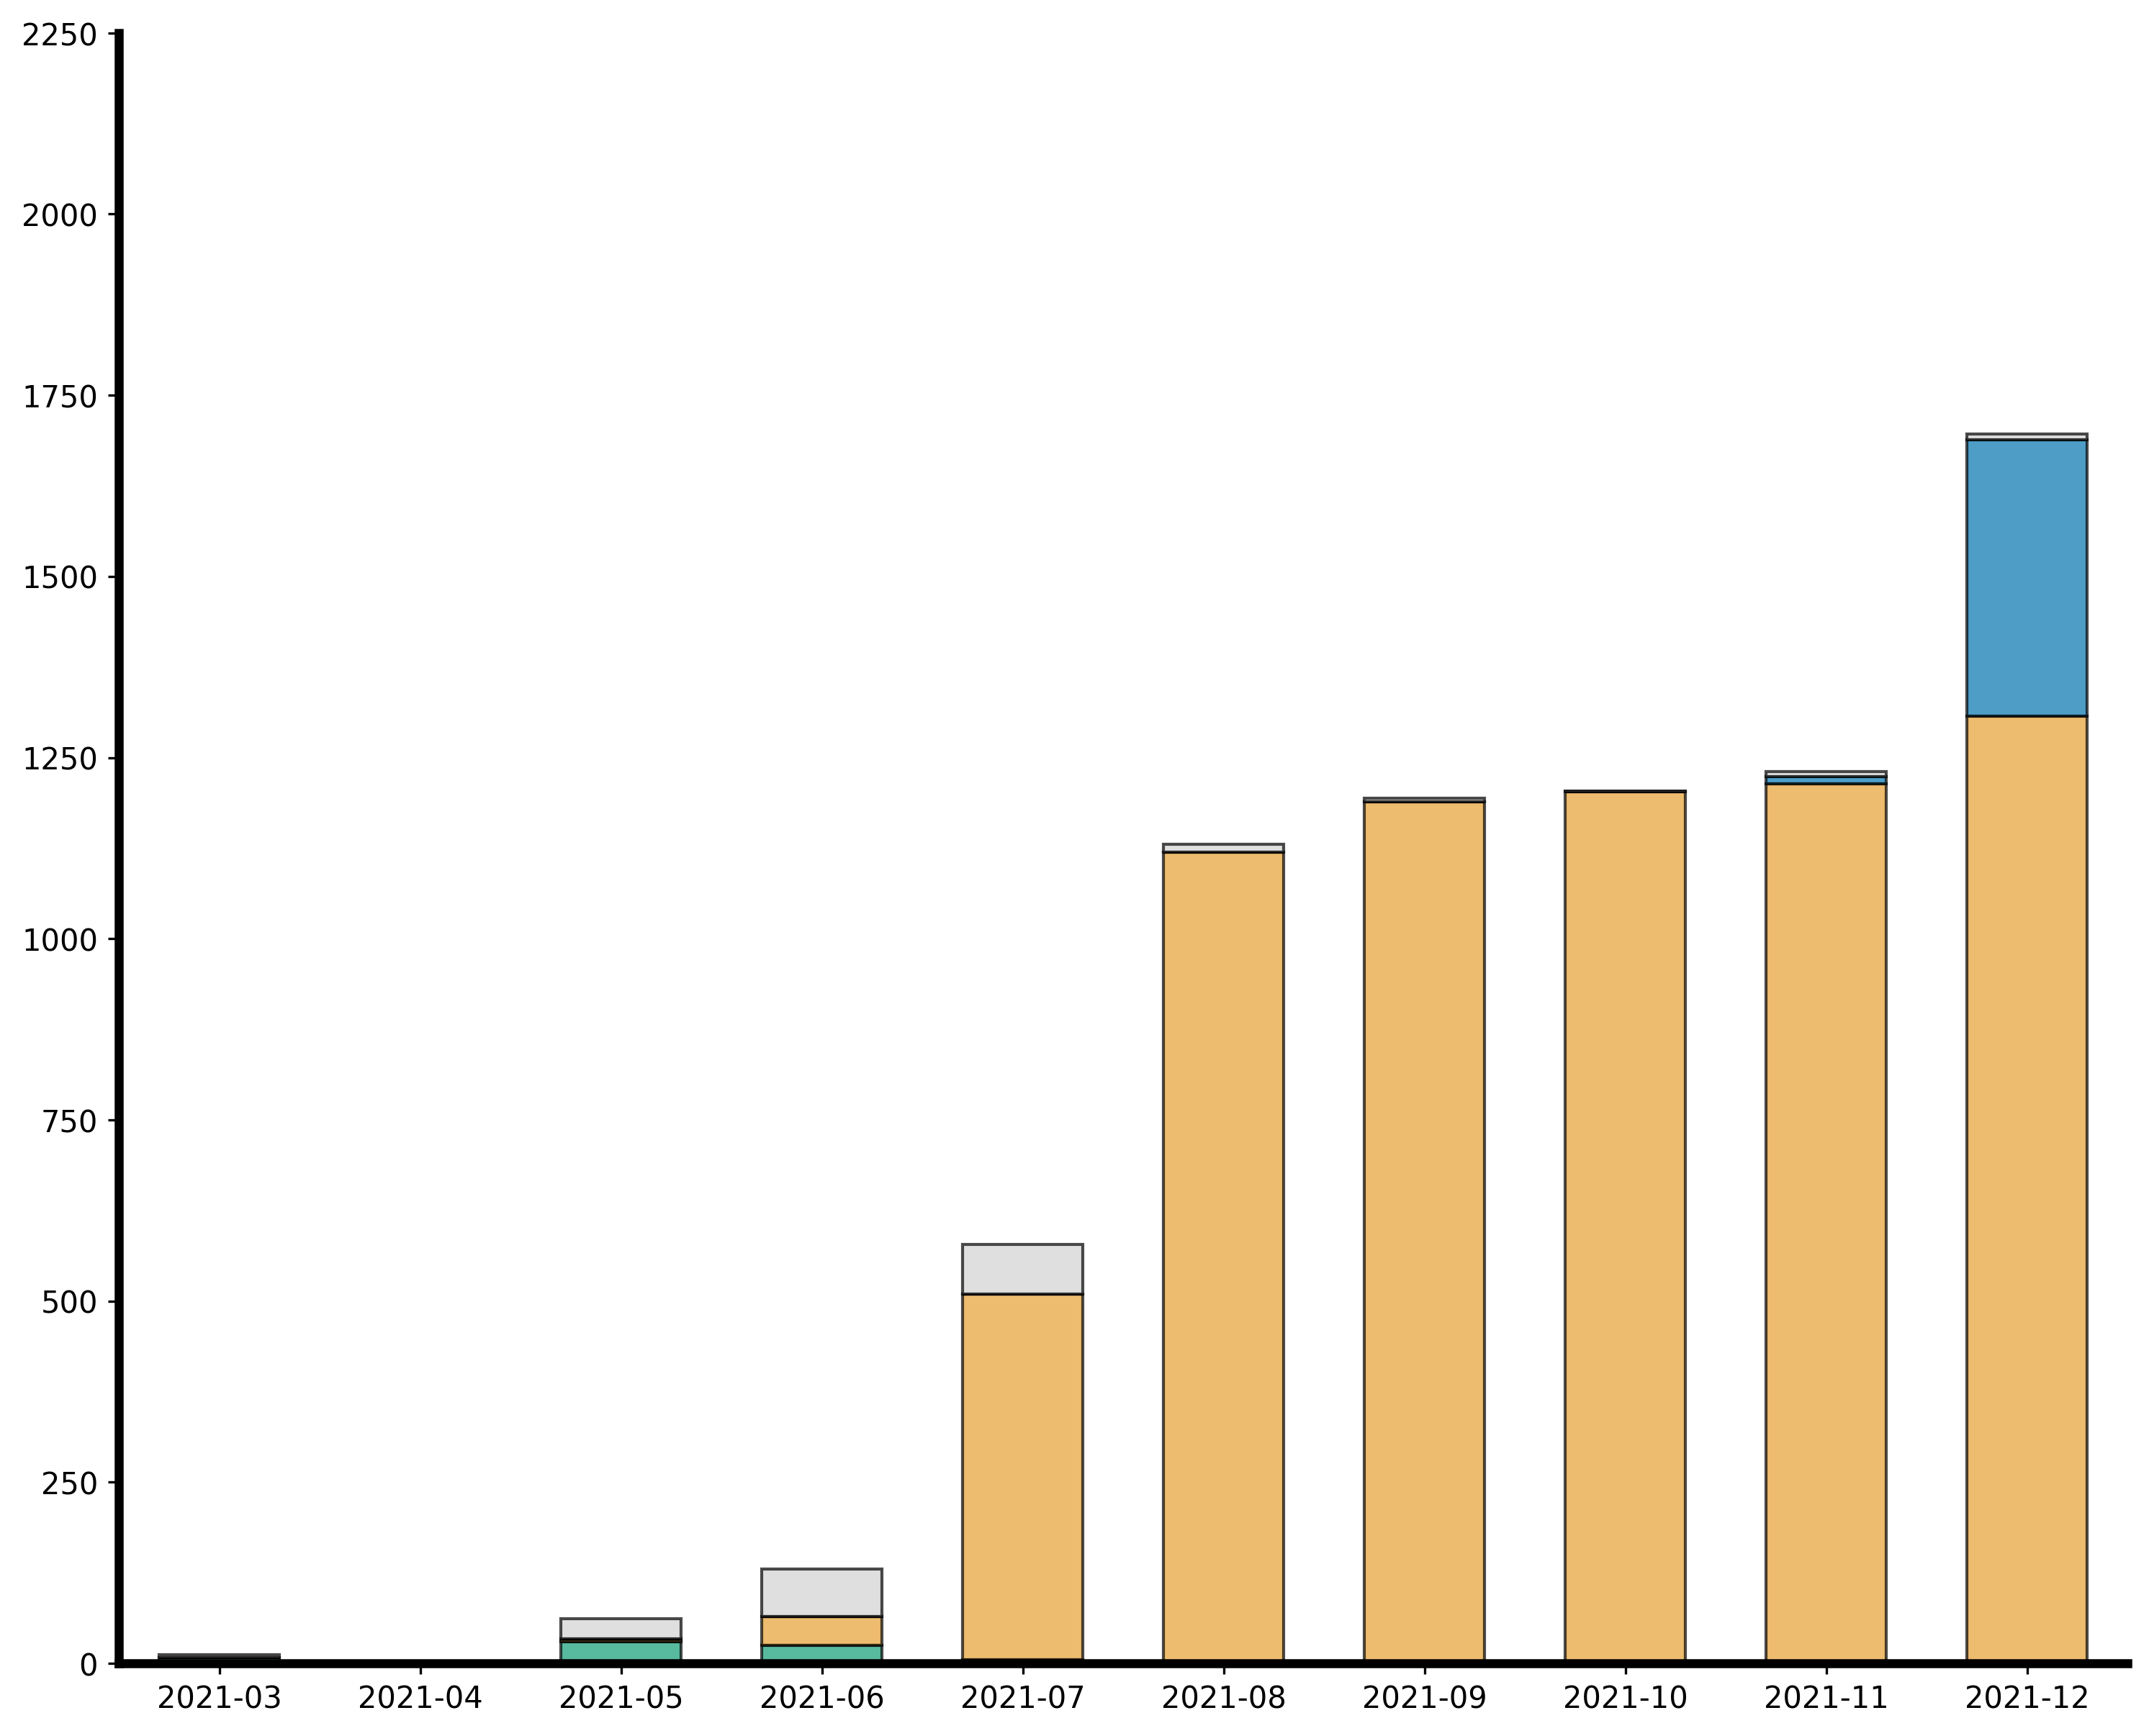

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10), dpi=300)

b_12 = np.add(b_alpha, b_delta).tolist()
b_123 = np.add(b_12, b_omicron).tolist()

plt.bar(months, b_alpha, edgecolor='black', color='#119D76', width=0.6, alpha=0.7)
plt.bar(months, b_delta, bottom=b_alpha, edgecolor='black', color='#E6A031', width=0.6, alpha=0.7)
plt.bar(months, b_omicron, bottom=b_12, edgecolor='black', color='#0274B0', width=0.6, alpha=0.7)
plt.bar(months, b_others, bottom=b_123, edgecolor='black', color='#D2D2D2', width=0.6, alpha=0.7)

plt.ylim(0, 2250)
plt.xlim(-0.5, len(months)-0.5)

ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../figures/Figure_1A.pdf')